In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

In [7]:
A = np.array([[-10, 0, -10, 0], 
              [0, -0.7, 9, 0], 
              [0, -1, -0.7, 0], 
              [1, 0, 0, 0]])

B = np.array([[20, 2.8],
              [0, -3.13], 
              [0, 0], 
              [0, 0]])

$\dot{x} = Ax + Bu, u = kx$

In [ ]:
B_0 = 

In [43]:
np.dot(A, B)

array([[-200.   ,  -28.   ],
       [   0.   ,    2.191],
       [   0.   ,    3.13 ],
       [  20.   ,    2.8  ]])

In [34]:
J = np.array([B, np.dot(A, B), np.dot(A, A).dot(B), np.dot(A, A).dot(A).dot(B)])

In [35]:
J

array([[[ 2.000000e+01,  2.800000e+00],
        [ 0.000000e+00, -3.130000e+00],
        [ 0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00]],

       [[-2.000000e+02, -2.800000e+01],
        [ 0.000000e+00,  2.191000e+00],
        [ 0.000000e+00,  3.130000e+00],
        [ 2.000000e+01,  2.800000e+00]],

       [[ 2.000000e+03,  2.487000e+02],
        [ 0.000000e+00,  2.663630e+01],
        [ 0.000000e+00, -4.382000e+00],
        [-2.000000e+02, -2.800000e+01]],

       [[-2.000000e+04, -2.443180e+03],
        [ 0.000000e+00, -5.808341e+01],
        [ 0.000000e+00, -2.356890e+01],
        [ 2.000000e+03,  2.487000e+02]]])

In [36]:
np.rank(J)

/home/alina/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  """Entry point for launching an IPython kernel.


3

In [54]:
Q = np.array([[1, 0, 2, 0], 
              [0, 1, 0, 0], 
              [2, 0, 6, 0], 
              [0, 0, 0, 0.5]])
R = np.array([[0.4, 0.3], [0.3, 0.4]])

In [55]:
np.linalg.eig(R)

(array([0.7, 0.1]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [56]:
S = sc.solve_continuous_are(A, B, Q, R)

In [62]:
k = np.linalg.inv(R).dot(B.T).dot(S)

In [102]:
k

array([[ 1.85172781,  0.88780949,  2.44946759,  1.63748715],
       [-1.14638705, -2.06585506, -0.98820795, -1.50542959]])

In [68]:
from scipy.integrate import odeint


In [77]:
np.dot(k, B)

array([[ 37.03455617,   2.40599416],
       [-22.92774102,   3.2562426 ]])

In [111]:
def simulator(x, t):
    return (A - np.dot(B, k)).dot(x)

def openloop(x, t):
    return np.dot(A, x)


def contol_inputs(x, t):
    return np.dot(B, np.dot(-k, x))

t = np.linspace(0, 10, 100)

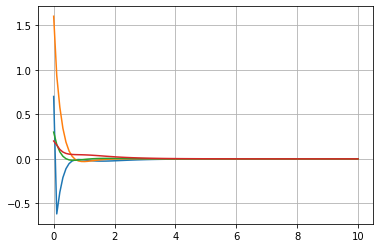

In [104]:

res = odeint(simulator, [0.7, 1.6, 0.3, 0.2], t)
plt.plot(t, res)
plt.grid()

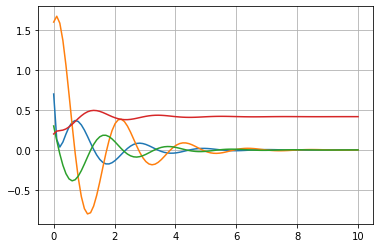

In [105]:
res = odeint(openloop, [0.7, 1.6, 0.3, 0.2], t)
plt.plot(t, res)
plt.grid()

In [127]:
k

array([[ 1.85172781,  0.88780949,  2.44946759,  1.63748715],
       [-1.14638705, -2.06585506, -0.98820795, -1.50542959]])

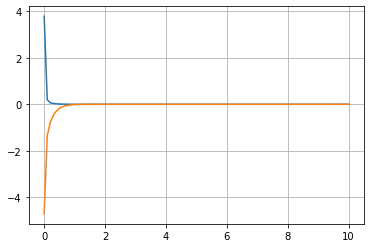

In [136]:
plt.plot(t, np.dot(k, res.T).T)
plt.grid()